2016년 1월 ~ 12월까지 우버 우행 기록

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/Uber/Uber.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [2]:
# info - 결측값 유무 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
# 데이터 형식 변경 후 unique로 고유값 확인
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors='coerce') # errors='coerce' : 변환 실패 시 NaT로 반환
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors='coerce')
df = df.sort_values(['START_DATE*', 'END_DATE*']) # 정렬 - 시작시간, 끝시간 순으로 정렬
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [5]:
df['START_DATE*'].unique()

<DatetimeArray>
['2016-01-01 21:11:00', '2016-01-02 01:25:00', '2016-01-02 20:25:00',
 '2016-01-05 17:31:00', '2016-01-06 14:42:00', '2016-01-06 17:15:00',
 '2016-01-06 17:30:00', '2016-01-07 13:27:00', '2016-01-10 08:05:00',
 '2016-01-10 12:17:00',
 ...
 '2016-12-30 11:31:00', '2016-12-30 15:41:00', '2016-12-30 16:45:00',
 '2016-12-30 23:06:00', '2016-12-31 01:07:00', '2016-12-31 13:24:00',
 '2016-12-31 15:03:00', '2016-12-31 21:32:00', '2016-12-31 22:08:00',
                 'NaT']
Length: 1155, dtype: datetime64[ns]

In [6]:
df['END_DATE*'].unique()

<DatetimeArray>
['2016-01-01 21:17:00', '2016-01-02 01:37:00', '2016-01-02 20:38:00',
 '2016-01-05 17:45:00', '2016-01-06 15:49:00', '2016-01-06 17:19:00',
 '2016-01-06 17:35:00', '2016-01-07 13:33:00', '2016-01-10 08:25:00',
 '2016-01-10 12:44:00',
 ...
 '2016-12-30 11:56:00', '2016-12-30 16:03:00', '2016-12-30 17:08:00',
 '2016-12-30 23:10:00', '2016-12-31 01:14:00', '2016-12-31 13:42:00',
 '2016-12-31 15:38:00', '2016-12-31 21:50:00', '2016-12-31 23:51:00',
                 'NaT']
Length: 1155, dtype: datetime64[ns]

In [7]:
# value_counts - 해당 컬럼의 고유값과 개수 확인
df['CATEGORY*'].value_counts()

CATEGORY*
Business    1078
Personal      77
Name: count, dtype: int64

In [8]:
# 시작 지점의 고유값과 개수 확인
df['START*'].value_counts()

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: count, Length: 177, dtype: int64

In [10]:
# 끝 지점의 고유값과 개수 확인
# 가장 빈도가 높은 5개의 끝 지점
df['STOP*'].value_counts().head()

STOP*
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Name: count, dtype: int64

In [11]:
# describe - 기술통계량 확인
df['MILES*'].describe()

count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES*, dtype: float64

In [12]:
# describe 메서드를 이용한 이상치 탐색
# 최대값을 가지는 행을 찾아봄
df[df['MILES*'] == df['MILES*'].max()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,NaT,NaT,NaN,NaN,NaN,12204.7,NaN


In [13]:
# describe 메서드를 이용한 이상치 탐색 후 제거
df = df.drop(1155)
df['MILES*'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES*, dtype: float64

In [14]:
# PURPOSE*의 고유값과 개수 확인
df['PURPOSE*'].value_counts()

PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [15]:
# isna와 sum 메서드를 이용한 결측치 개수 구하기
df['PURPOSE*'].isna().sum()

502

In [16]:
# 운행시간 구하기 
# datetime 변수의 단위 변환 (분)
df['DURATION*'] = (df['END_DATE*'] - df['START_DATE*']).dt.total_seconds() / 60
df['DURATION*']

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Name: DURATION*, Length: 1155, dtype: float64

In [17]:
# groupby를 이용한 그룹별 통계값 확인
# 카테고리별 운행거리와 운행시간의 평균, 표준편차, 개수 확인
df.groupby(['CATEGORY*','PURPOSE*'])[['MILES*','DURATION*']].agg(['mean','std','count'])

MILES*                    DURATION*             \
                                 mean        std count        mean        std   
CATEGORY* PURPOSE*                                                              
Business  Airport/Travel     5.500000   1.852026     3   26.000000   9.848858   
          Between Offices   10.944444   8.458913    18   25.500000  15.553513   
          Customer Visit    20.688119  40.632891   101   33.415842  42.891087   
          Errand/Supplies    3.968750   3.464619   128   12.976562   9.656677   
          Meal/Entertain     5.698125   5.019690   160   16.125000  10.477739   
          Meeting           15.247594  25.093394   187   29.737968  26.662381   
          Temporary Site    10.474000   7.757440    50   25.860000  18.233195   
Personal  Charity ($)       15.100000        NaN     1   27.000000        NaN   
          Commute          180.200000        NaN     1  185.000000        NaN   
          Moving             4.550000   1.181807     4   15.000000   4.546061   

                                 
                          count  
CATEGORY* PURPOSE*               
Business  Airport/Travel      3  
          Between Offices    18  
          Customer Visit    101  
          Errand/Supplies   128  
          Meal/Entertain    160  
          Meeting           187  
          Temporary Site     50  
Personal  Charity ($)         1  
          Commute             1  
          Moving              4

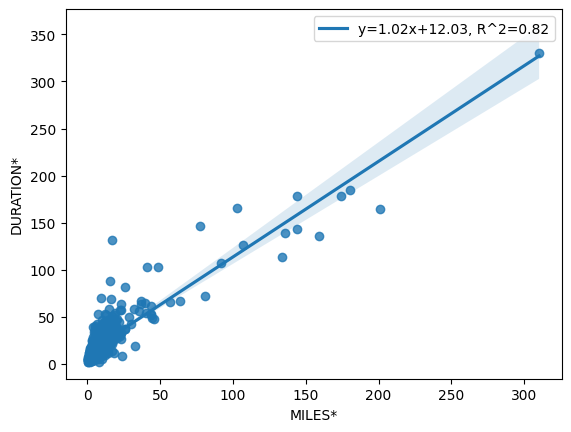

In [18]:
# 시각화를 통한 운행 거리와 운행 시간 변수간 상관관계 확인
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

df = df.dropna() # 결측치 제거 - 결측치가 있는 경우 선형회귀분석을 할 수 없음
s, i, r, _, _ = linregress(df['MILES*'], df['DURATION*']) # 피어슨 상관계수

fig, ax = plt.subplots()

sns.regplot(x='MILES*', y='DURATION*', data=df, ax=ax,  
            line_kws={'label':'y={:.2f}x+{:.2f}, R^2={:.2f}'.format(s, i, r**2)}) # 선형회귀선 추가
plt.legend()